In [1]:
import os
os.chdir(os.pardir)

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import matplotlib.patches as mpatches
import pandas as pd

import vapor
from vapor.models import Cambium

2020-10-12 20:58:35,981 [MainThread  ] [INFO ]  Starting log for vapor...


In [2]:

dfs = []

# --- Define Optimization Variables ---
aggregate_region = 'state'
opt_vars = ['marginal_cost_mwh']
scenarios = ['StdScen19_High_RE_Cost', 'StdScen19_Low_RE_Cost', 'StdScen19_Mid_Case']
techs = ['pv', 'wind']
batt_sizes = [0., 25., 100.]
batt_durations = [4.]

for opt_var in opt_vars:
    for scenario in scenarios:
        for tech in techs:
            for batt_size in batt_sizes:
                for batt_duration in batt_durations:
                    file = f"{aggregate_region}_best_{tech}_{scenario}_{opt_var}_batt_{batt_size}_{batt_duration}.pkl"
                    fp = os.path.join('results',file)
                    dfs.append(pd.read_pickle(fp))


results = pd.concat(dfs, axis='rows')


In [3]:
Viz = vapor.Visualizer(results=results, aggregate_region=aggregate_region)

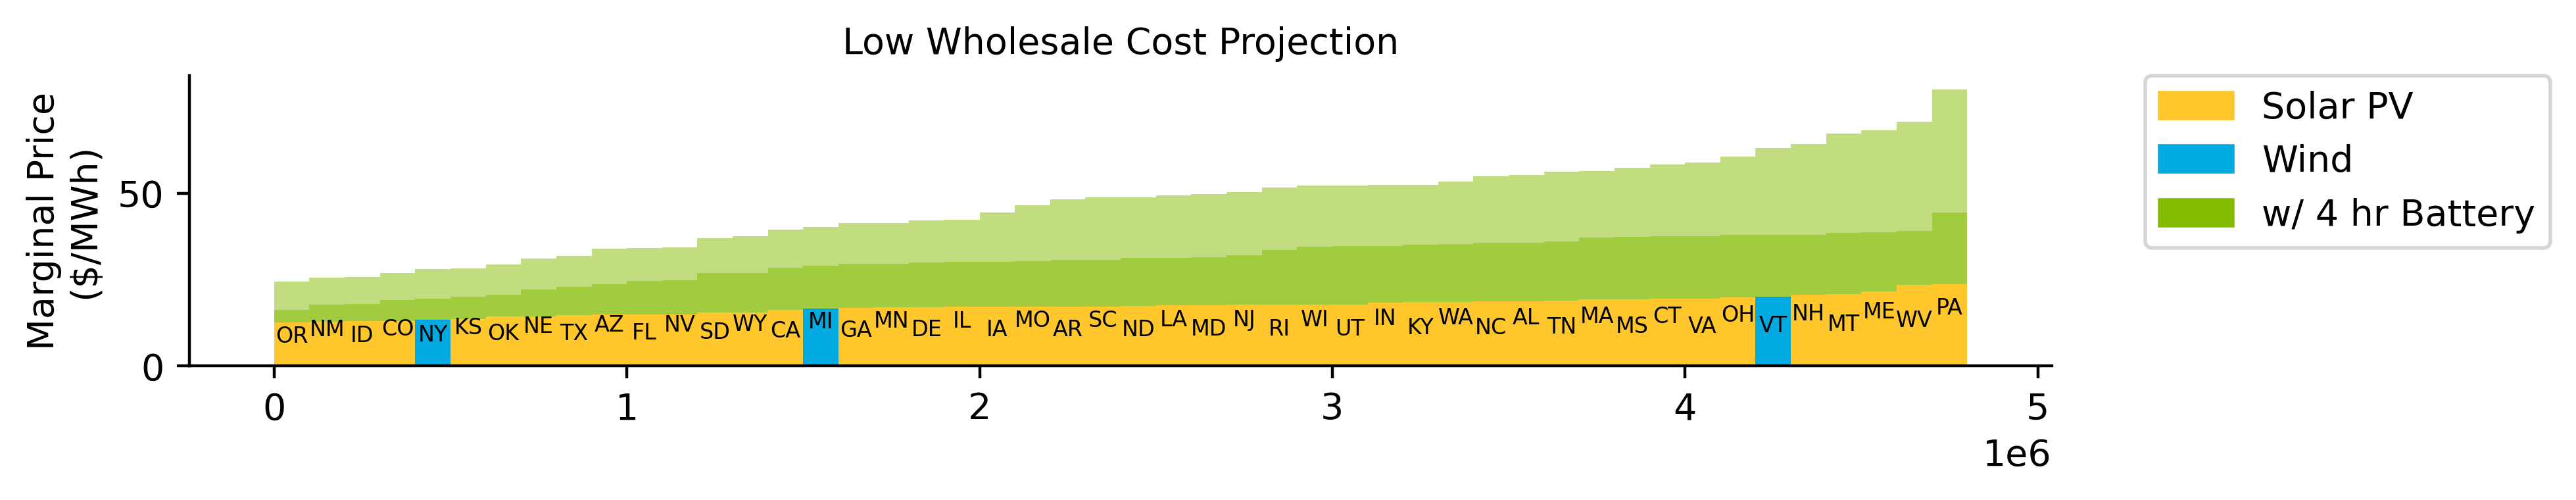

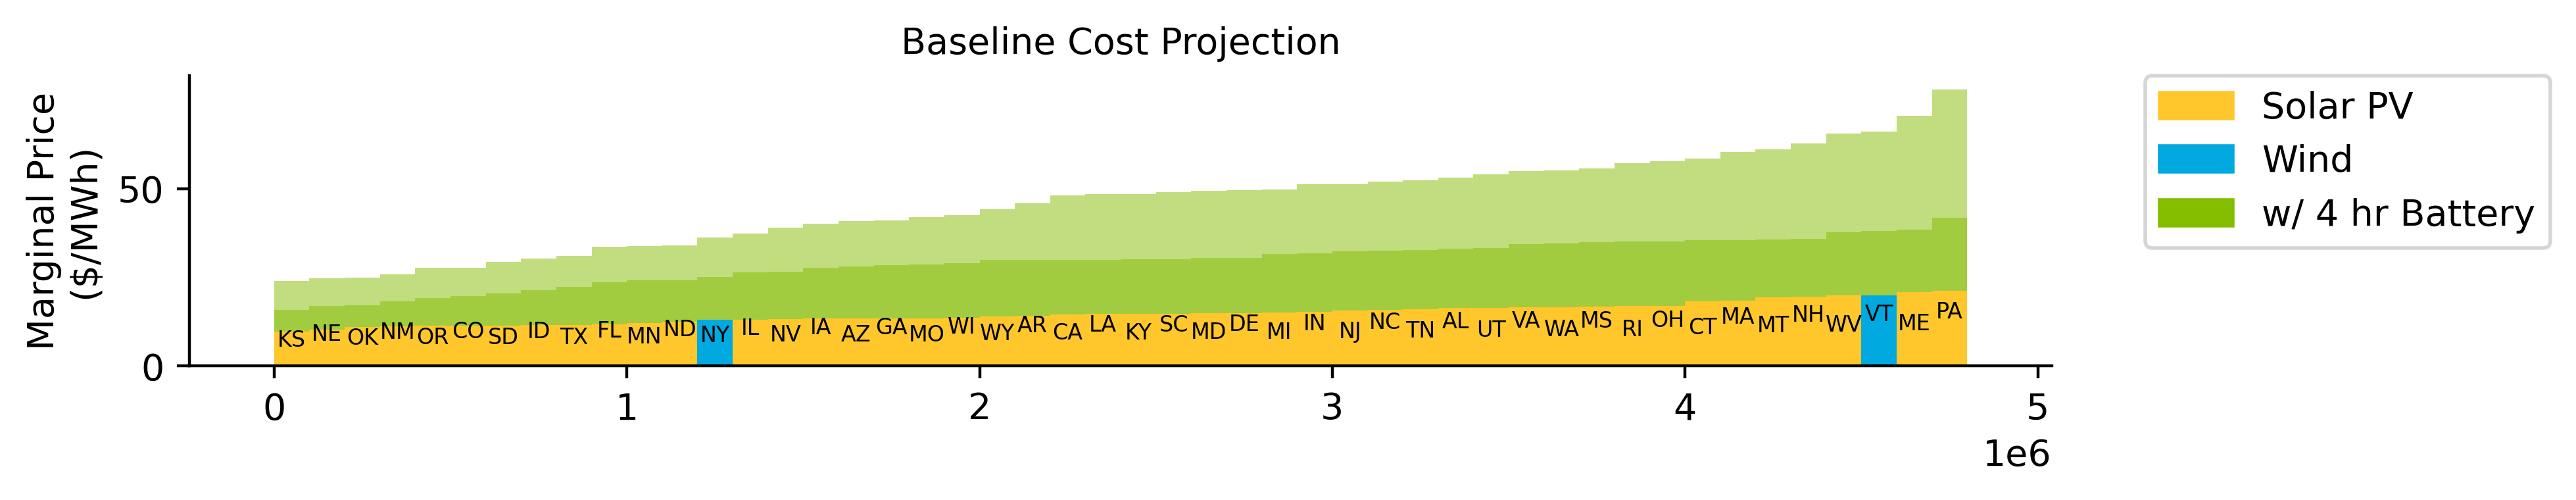

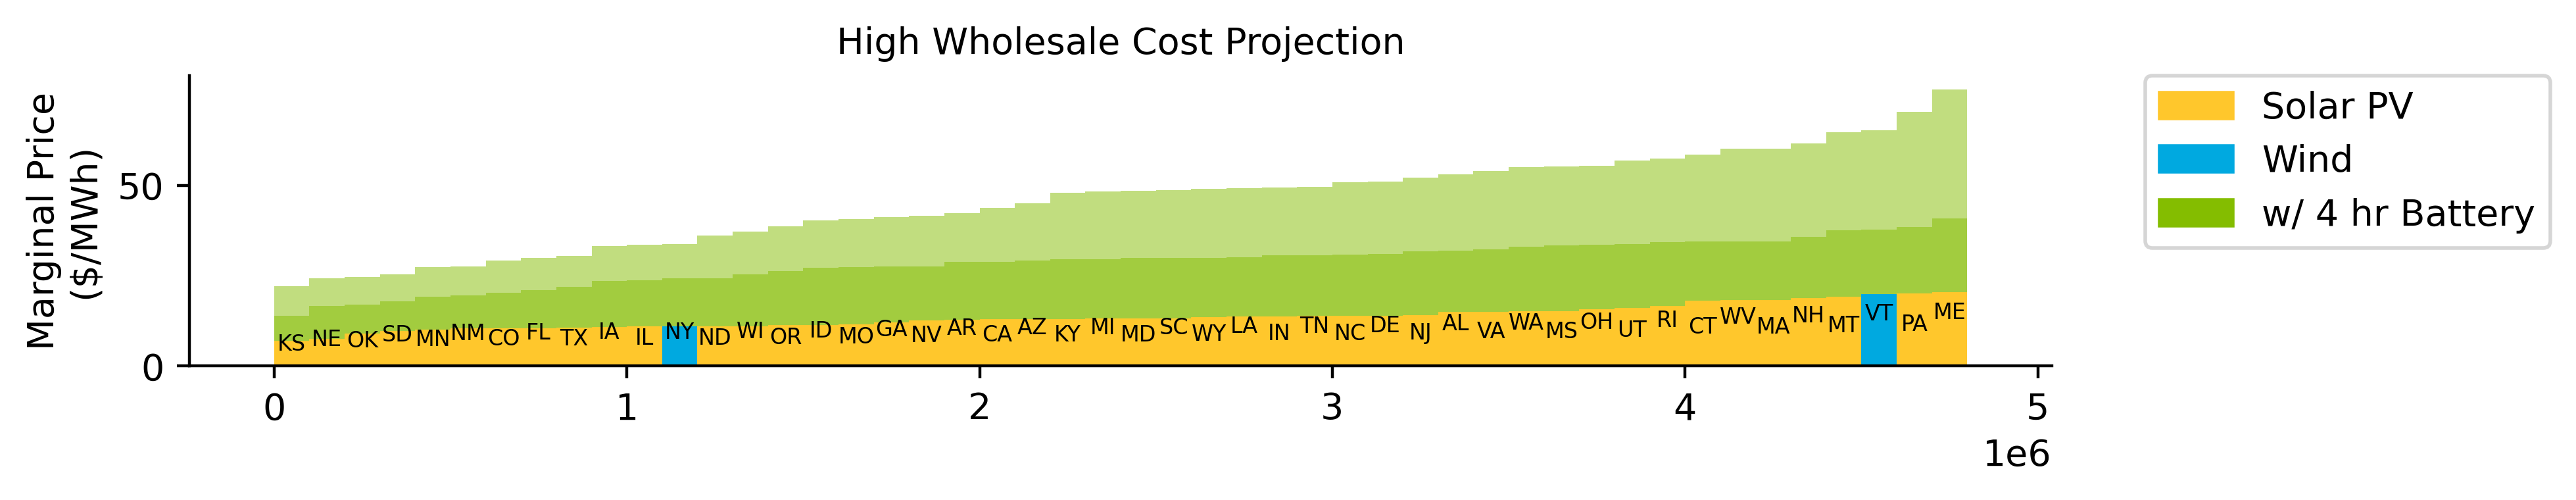

In [4]:
opt_var = 'marginal_cost_mwh'
Viz.supply_curve(opt_var, 'StdScen19_Low_RE_Cost', batt_sizes=[25, 100], legend=True)
Viz.supply_curve(opt_var, 'StdScen19_Mid_Case', batt_sizes=[25, 100], legend=True)
Viz.supply_curve(opt_var, 'StdScen19_High_RE_Cost', batt_sizes=[25, 100], legend=True)

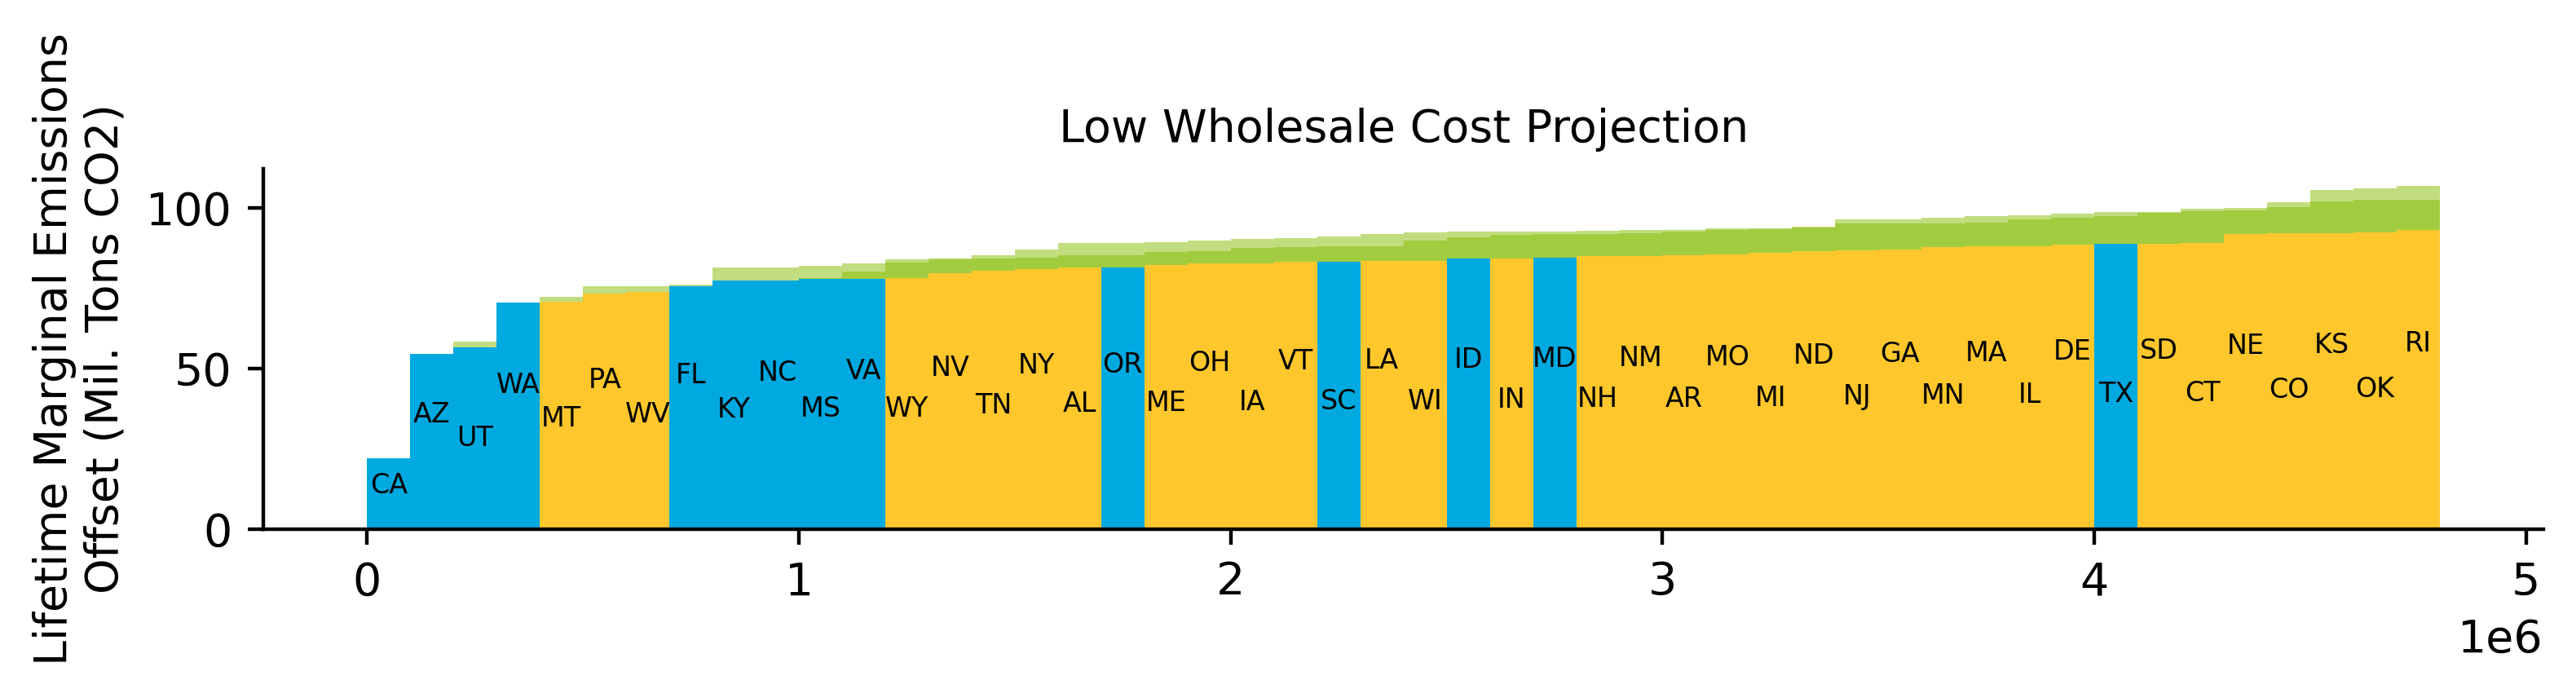

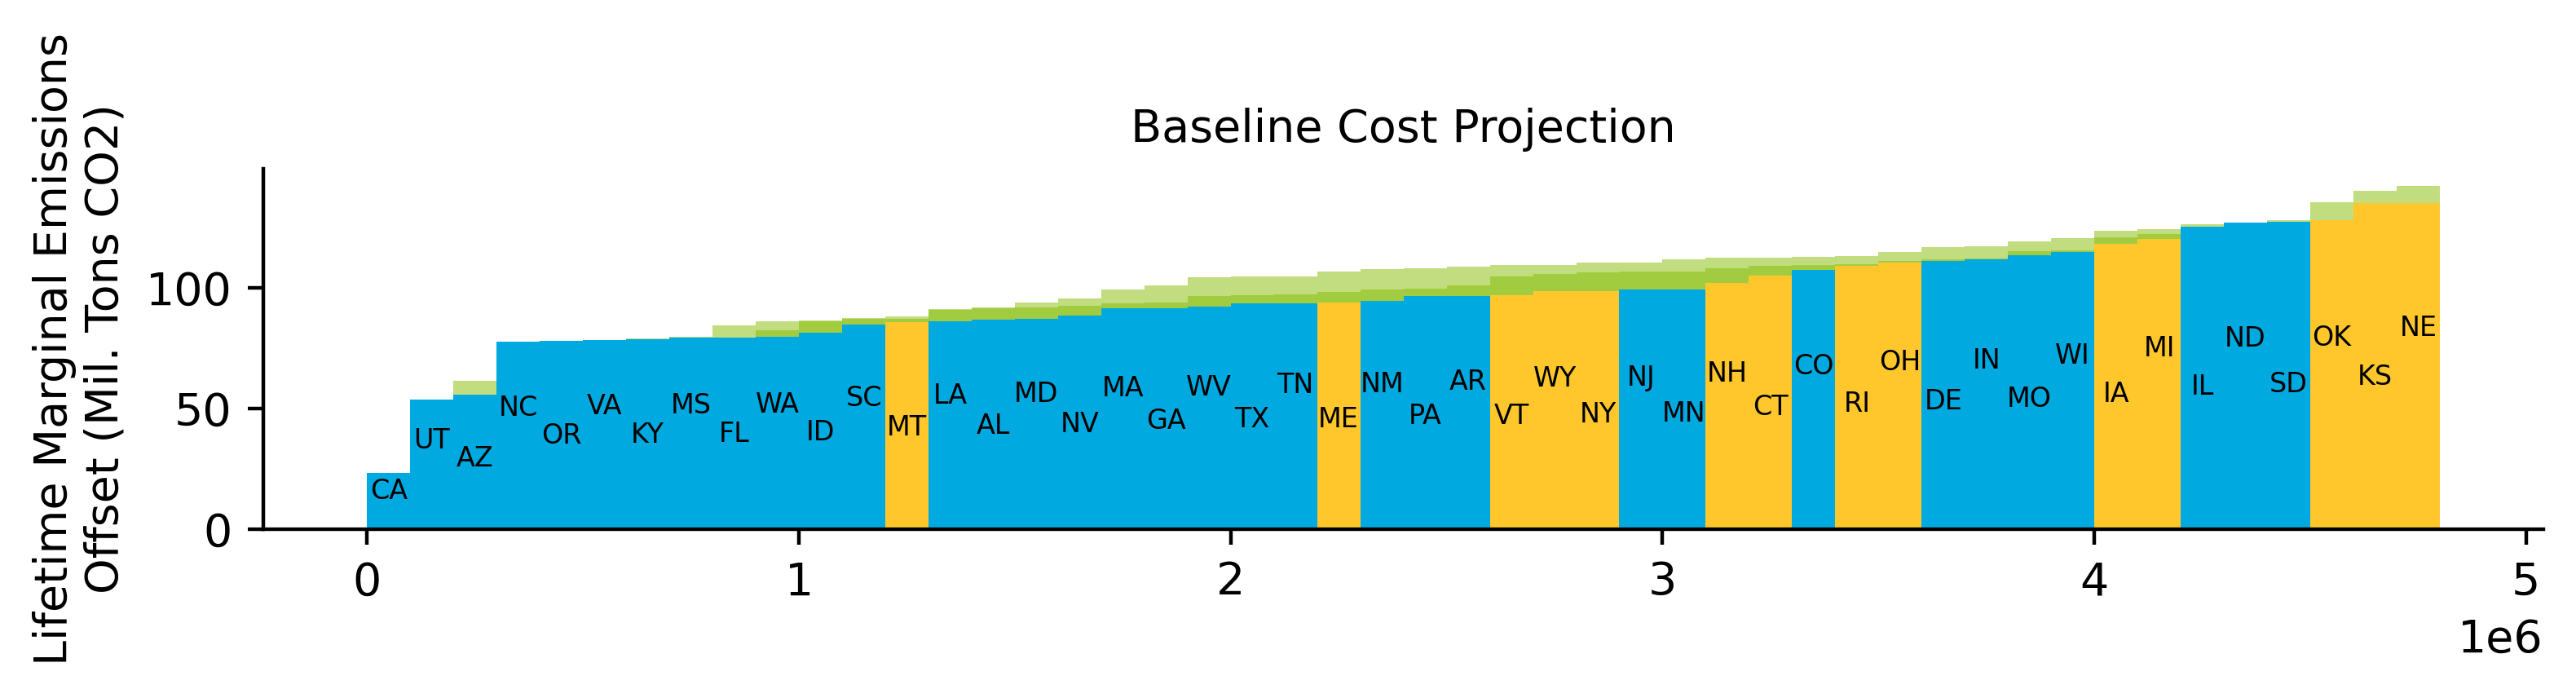

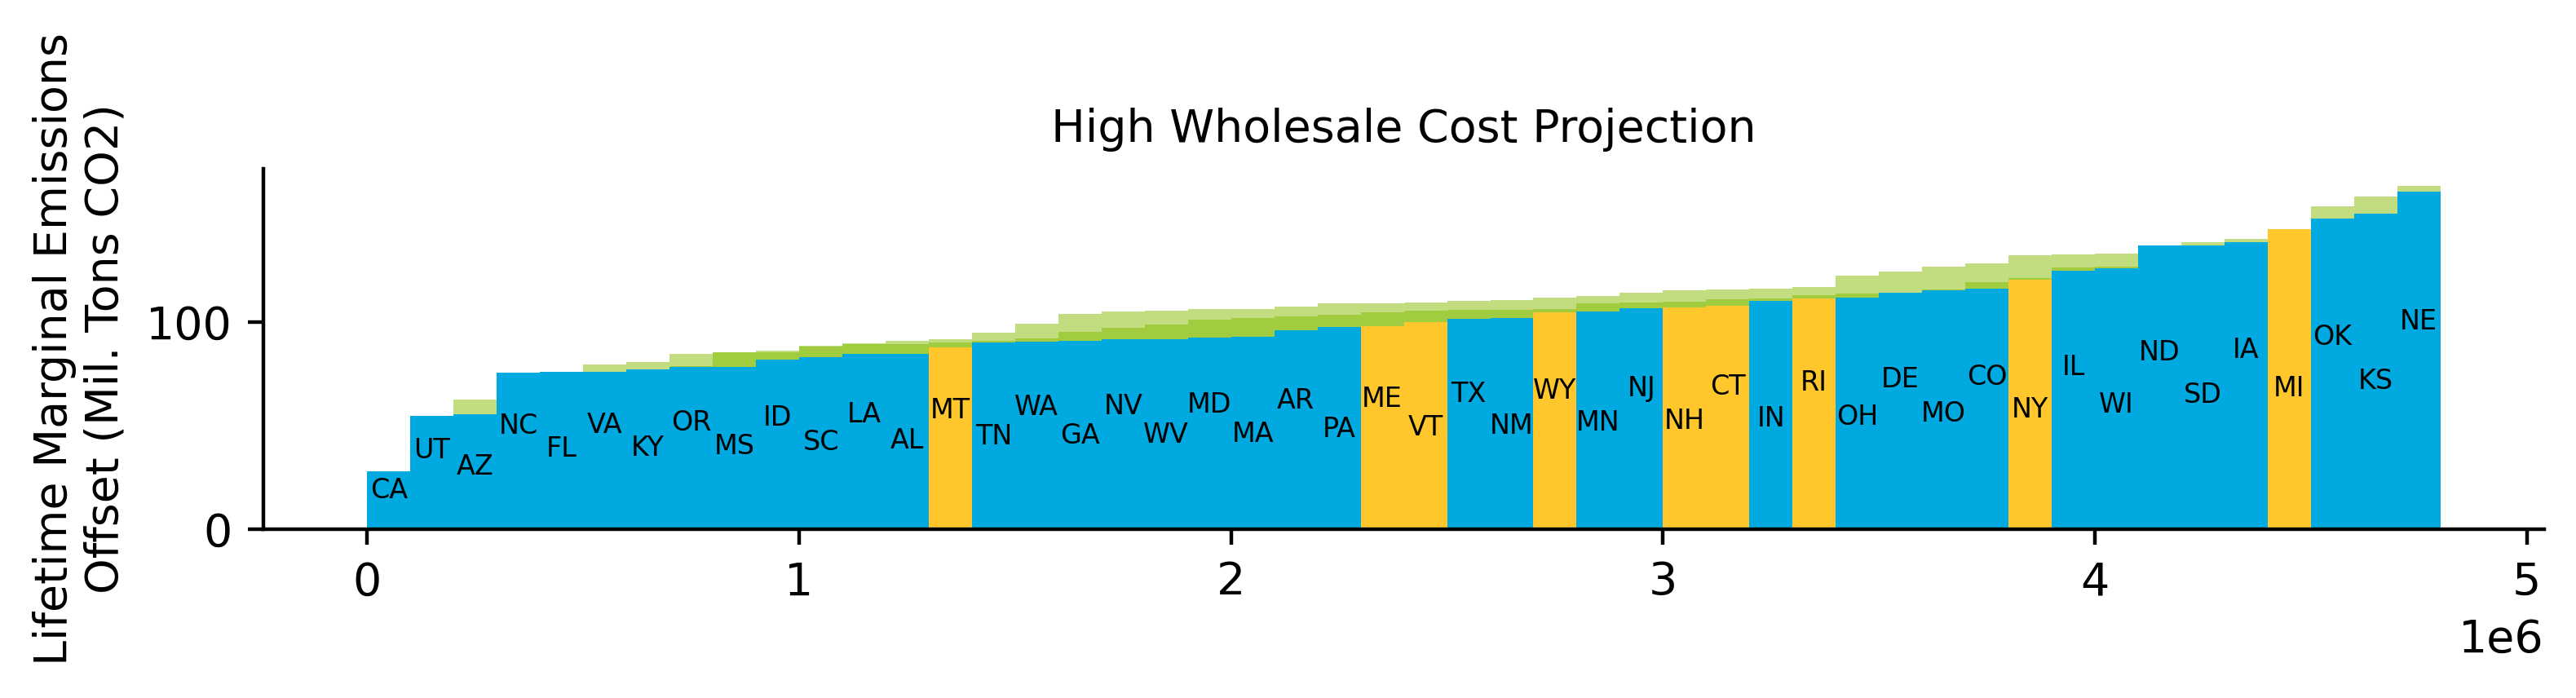

In [5]:
opt_var = 'lifetime_co2_rate_marginal'
label = 'Lifetime Marginal Emissions\nOffset (Mil. Tons CO2)'
Viz.supply_curve(opt_var, 'StdScen19_Low_RE_Cost', batt_sizes=[25, 100], legend=False, label=label)
Viz.supply_curve(opt_var, 'StdScen19_Mid_Case', batt_sizes=[25, 100], legend=False, label=label)
Viz.supply_curve(opt_var, 'StdScen19_High_RE_Cost', batt_sizes=[25, 100], legend=False, label=label)

In [6]:
list(results.columns)

['adjusted_installed_cost',
 'analysis_period_irr',
 'cash_for_debt_service',
 'cbi_fedtax_total',
 'cbi_statax_total',
 'cbi_total',
 'cbi_total_fed',
 'cbi_total_oth',
 'cbi_total_sta',
 'cbi_total_uti',
 'cf_length',
 'cost_debt_upfront',
 'cost_financing',
 'cost_installed',
 'cost_installedperwatt',
 'cost_prefinancing',
 'debt_fraction',
 'depr_alloc_custom',
 'depr_alloc_macrs_15',
 'depr_alloc_macrs_5',
 'depr_alloc_none',
 'depr_alloc_none_percent',
 'depr_alloc_sl_15',
 'depr_alloc_sl_20',
 'depr_alloc_sl_39',
 'depr_alloc_sl_5',
 'depr_alloc_total',
 'depr_fedbas_after_itc_custom',
 'depr_fedbas_after_itc_macrs_15',
 'depr_fedbas_after_itc_macrs_5',
 'depr_fedbas_after_itc_sl_15',
 'depr_fedbas_after_itc_sl_20',
 'depr_fedbas_after_itc_sl_39',
 'depr_fedbas_after_itc_sl_5',
 'depr_fedbas_after_itc_total',
 'depr_fedbas_cbi_reduc_custom',
 'depr_fedbas_cbi_reduc_macrs_15',
 'depr_fedbas_cbi_reduc_macrs_5',
 'depr_fedbas_cbi_reduc_sl_15',
 'depr_fedbas_cbi_reduc_sl_20',
 'depr

In [7]:
grouped = results.groupby(['scenario','tech','batt_size'], as_index=False)\
                [['marginal_cost_mwh','lifetime_co2_rate_avg','lifetime_cambium_total_value']].mean()
grouped.to_csv('temp.csv')

In [8]:
grouped

,scenario,tech,batt_size,marginal_cost_mwh,lifetime_co2_rate_avg,lifetime_cambium_total_value
0,StdScen19_High_RE_Cost,pv,0.0,13.744186,1.289531e+08,1.292132e+08
1,StdScen19_High_RE_Cost,pv,25.0,32.058580,1.312204e+08,1.315454e+08
2,StdScen19_High_RE_Cost,pv,100.0,62.543291,1.237101e+08,1.240459e+08
3,StdScen19_High_RE_Cost,wind,0.0,39.569570,1.063929e+08,1.066796e+08
4,StdScen19_High_RE_Cost,wind,25.0,44.601804,1.091193e+08,1.094133e+08
5,StdScen19_High_RE_Cost,wind,100.0,57.449917,1.164347e+08,1.167593e+08
6,StdScen19_Low_RE_Cost,pv,0.0,17.637387,8.495413e+07,8.527558e+07
7,StdScen19_Low_RE_Cost,pv,25.0,35.596198,9.163208e+07,9.208287e+07
8,StdScen19_Low_RE_Cost,pv,100.0,65.260379,9.171359e+07,9.220911e+07
9,StdScen19_Low_RE_Cost,wind,0.0,39.953763,9.884934e+07,9.945926e+07


In [9]:
# spaghetti plot of existing 'lifetime_cambium_total_value' through 2050
# spaghetti plot of existing co2 through 2050 